# Análisis de sentimiento
Se refiere al uso de procesamiento de lenguaje natural, análisis de texto y lingüística computacional para identificar y extraer información subjetiva de los recursos. Desde el punto de vista de la minería de textos, el análisis de sentimientos es una tarea de clasificación masiva de documentos de manera automática, en función de la connotación positiva o negativa del lenguaje ocupado en el documento.

## Análisis del Problema
Analizar los sentimientos de twitter de iphones y Galaxies

![Autos ROC](img/iphone.jpg)

In [68]:
library(lubridate)
library(twitteR)
library(stringr)
library(ggplot2)
library(xlsx)
library(base64enc)


download.file(url="http://curl.haxx.se/ca/cacert.pem",
destfile="cacert.pem") #downloads the certificate

api_key <- "QxJVwsr1emy2zx4NDF9GomqF8"
api_secret <- "HpsbjLisWp8dzaJ5SjquNJGM0pkYaS83pXSDQ7PNYuh7NRlfn0"
access_token <- "1003669823325392896-ng93NuiPLNU4WNDsnDJBjjsCcX0ulS"
access_token_secret <- "RnHDGUl8v28MoClWw9dHRRfYKXE0eO2tBv1biSdngpdeS"
setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)

Warning message:
"package 'lubridate' was built under R version 3.5.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



[1] "Using direct authentication"


In [56]:
origop <- options("httr_oauth_cache")
options(httr_oauth_cache = TRUE)

In [57]:
tuits <- twitteR::searchTwitteR("iphone", n=100, lang="es", since="2019-01-01", until="2019-11-29",
                                 locale=NULL, geocode=NULL, sinceID=NULL, maxID=NULL,
                                 resultType=NULL, retryOnRateLimit=1200000)
# Es recomendable guardar los datos en disco 
# ya que su descarga de internet puede ser muy lenta.
#save(tuits,file = "iphone_w.RData")
df <- do.call("rbind", lapply(tuits, as.data.frame))
write.csv(df, file="data.csv")

In [58]:
tuits

[[1]]
[1] "GuillermRodrigu: RT @nosoyelpunta: Os prometo que para defender el comunismo acabo de leer que en esos países \"son más felices con menos cosas\". Escrito des…"

[[2]]
[1] "Markoky11: Ya mi Sugar Mommy me dijo que me iba a comprar un iPhone nuevo porque el mío ya estaba feo jaja<U+0001F970>"

[[3]]
[1] "javiqprg222: @SrtaAlienade @wallstwolverine Xiaomi mejor que iPhone"

[[4]]
[1] "wilsonsandoya: RT @MiltonFriedom: En Cuba ganan 5 dolares al mes, hacen 8 horas de cola para un kilo de arroz y nadie protesta. Pero el sistema donde la g…"

[[5]]
[1] "Freddy_LA: @JavierZurita De repente ya no quiero mi iPhone Jajja"

[[6]]
[1] "ErikaBundy: RT @pablocarrozza: Los traperos se llenan la boca con la inclusión social y la escuela de la calle, y después los vemos tirando dólares des…"

[[7]]
[1] "Apple4Barres: RT @jeff_umanzor: <U+2705>Interfaz del iPhone 11 Pro en iPhone X y anteriores<U+0001F633>\n\n<U+2705> Interfaz de cámara de iPhone 11 en modelos anteriores<U+0001F525>\n\n<U+27

In [59]:
tuits$text

NULL

In [60]:
limpiar.tuits <- function(tuit){
    # Eliminar los links
    texto <- tuit$text
    texto <- str_replace_all(texto,"(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", " ")
    # Elimina la referencia a un retuit
    texto <- str_replace_all(texto,"(RT|via)((?:\\b\\W*@\\w+)+)", " ")
    # Elimina los #hashtag
    texto <- str_replace_all(texto,"#\\w+", " ")
    # Elimina la referencia a @usuarios
    texto <- str_replace_all(texto,"@\\w+", " ")
    # Elimina los signos de puntuaciÃ³n
    texto <- str_replace_all(texto,"[[:punct:]]", " ")
    # Elimina los numeros
    texto <- str_replace_all(texto,"[[:digit:]]", " ")
    # Elimina espacios innecesarios
    texto <- str_replace_all(texto,"[ \t]{2,}", " ")
    texto <- str_replace_all(texto,"^\\s+|\\s+$", "")
    texto <- str_replace_all(texto,"\\n", "")
    # Retorna el texto limpio y la fecha de publicacin
    list(texto =texto,fecha = as.character(tuit$created))
    }

In [61]:
#Limpiar tuits
tuits.limpios <- lapply(tuits,limpiar.tuits)
tuits.limpios[[1]]

$texto
[1] "Os prometo que para defender el comunismo acabo de leer que en esos países son más felices con menos cosas Escrito des"

$fecha
[1] "2019-11-14 21:32:58"

In [62]:
#Carga de palabras positivas
palabras.positivas <-read.csv("Palabras-Positivas.csv",stringsAsFactors = F)
palabras.positivas <- as.vector(palabras.positivas[,1])
#Carga de palabras negativas
palabras.negativas <-read.csv("Palabras-Negativas.csv",stringsAsFactors = F)
palabras.negativas <- as.vector(palabras.negativas[,1])

In [65]:
palabras.positivas

[1] "abogó"               "abrazo"              "abunda"             
   [4] "abundancia"          "abundante"           "abundar"            
   [7] "accesible"           "aclamación"          "aclamado"           
  [10] "aclamar"             "aclarar"             "aclaró"             
  [13] "acogedor"            "acomodadizo"         "acomodaticia"       
  [16] "acomodaticio"        "acreditado"          "actualizable"       
  [19] "actualizado"         "adaptable"           "adaptado"           
  [22] "adaptar"             "adecuado"            "adelantamiento"     
  [25] "adelantar"           "adherirse"           "admirable"          
  [28] "admirablemente"      "admiración"          "admirador"          
  [31] "admirar"             "admirativamente"     "admirativo"         
  [34] "adorable"            "adoración"           "adorada"            
  [37] "adorado"             "adorador"            "adoradora"          
  [40] "adorando"            "adorar"              "adulación"          
  [43] "adulador"            "aduladora"           "adular"             
  [46] "afabilidad"          "afable"              "afablemente"        
  [49] "afecto"              "afectuosamente"      "afición"            
  [52] "aficionado"          "afilado"             "afinidad"           
  [55] "afirmación"          "afirmar"             "afirmativamente"    
  [58] "afirmativo"          "afluencia"           "afortunadamente"    
  [61] "afortunado"          "ágil"                "agilidad"           
  [64] "ágilmente"           "agraciado"           "agrada"             
  [67] "agradabilidad"       "agradable"           "agradablemente"     
  [70] "agradecer"           "agradecido"          "agudeza"            
  [73] "agudo"               "ahorrador"           "ahorrativo"         
  [76] "ahorro"              "ahorros"             "ajustable"          
  [79] "alabando"            "alabanza"            "alabar"             
  [82] "alcista"             "alegrar"             "alegre"             
  [85] "alegremente"         "alegría"             "alentador"          
  [88] "alentadoramente"     "aleteo"              "alimento"           
  [91] "alivio"              "altruista"           "alucinante"         
  [94] "ama"                 "amabilidad"          "amable"             
  [97] "amablemente"         "amado"               "amanecer"           
 [100] "amante"              "ambiciosamente"      "ambicioso"          
 [103] "amigablemente"       "amistad"             "amistoso"           
 [106] "amor"                "amoroso"             "ampliamente"        
 [109] "amplio"              "ángel"               "angelical"          
 [112] "animado"             "animar"              "ánimo"              
 [115] "ansioso"             "apasionadamente"     "apasionado"         
 [118] "apelar"              "aplaudir"            "apoteosis"          
 [121] "apoya"               "apoyado"             "apoyar"             
 [124] "apoyarse"            "apoyo"               "aprecia"            
 [127] "apreciable"          "apreciado"           "apreciar"           
 [130] "apreciativamente"    "apreciativo"         "aprobación"         
 [133] "aprobado"            "aprobar"             "apropiado"          
 [136] "ardiente"            "ardientemente"       "armonía"            
 [139] "armoniosamente"      "armonioso"           "armonizar"          
 [142] "articular"           "asegurando"          "asegurar"           
 [145] "asequible"           "asequibles"          "asombrado"          
 [148] "asombrar"            "asombro"             "asombrosamente"     
 [151] "asombroso"           "aspiración"          "aspiraciones"       
 [154] "aspirar"             "astutamente"         "atento"             
 [157] "atracción"           "atractivo"           "atraer"             
 [160] "atrevidamente"       "atrevido"            "audible"            
 [163] "auge"                "auténtico"           "autodeter

In [63]:
palabras.negativas

[1] "abandonar"            "abandonos"            "abaratar"            
   [4] "abatido"              "abatimiento"          "abigarrado"          
   [7] "abismal"              "abismalmente"         "abismo"              
  [10] "abollado"             "abolladura"           "abolladuras"         
  [13] "abominable"           "abominablemente"      "abominación"         
  [16] "abominar"             "aborrecedores"        "aborta"              
  [19] "abortado"             "abortar"              "aborto"              
  [22] "abrasador"            "abrasadoramente"      "abrasivo"            
  [25] "abruma"               "abrumado"             "abrumador"           
  [28] "abrumadora"           "abrumadoramente"      "abrumar"             
  [31] "abruptamente"         "abrupto"              "absurda"             
  [34] "absurdamente"         "absurdo"              "aburrida"            
  [37] "aburrida"             "aburrido"             "aburrimiento"        
  [40] "abusa"                "abusada"              "abusado"             
  [43] "abusiva"              "abusivo"              "abuso"               
  [46] "abusos"               "accidental"           "accidente"           
  [49] "accidentes"           "acobardar"            "acosa"               
  [52] "acosado"              "acosar"               "acose"               
  [55] "acoso"                "acusa"                "acusación"           
  [58] "acusaciones"          "acusando"             "acusar"              
  [61] "acusatoriamente"      "acuso"                "adictivo"            
  [64] "adicto"               "adictos"              "adoctrinamiento"     
  [67] "adoctrinar"           "adulteración"         "adulterado"          
  [70] "adulterar"            "adversaria"           "adversario"          
  [73] "adversidad"           "adverso"              "advertencia"         
  [76] "aflicción"            "afligido"             "afligir"             
  [79] "afligirse"            "afrenta"              "agonía"              
  [82] "agonías"              "agónicamente"         "agonizante"          
  [85] "agonizar"             "agotado"              "agotador"            
  [88] "agotamiento"          "agotar"               "agravación"          
  [91] "agravante"            "agravar"              "agraviado"           
  [94] "agravio"              "agresión"             "agresividad"         
  [97] "agresivo"             "agresor"              "agriamente"          
 [100] "agrietado"            "agrietarse"           "agrio"               
 [103] "aguafiestas"          "agujereado"           "agujero"             
 [106] "ahogar"               "ahogarse"             "ahogo"               
 [109] "airadamente"          "airado"               "aislado"             
 [112] "aislamiento"          "aislar"               "alarma"              
 [115] "alarmada"             "alarmado"             "alarmante"           
 [118] "alarmantemente"       "alborotador"          "alboroto"            
 [121] "alcahuete"            "alegación"            "alegar"              
 [124] "alergia"              "alergias"             "alérgico"            
 [127] "algarabía"            "alicaído"             "alienación"          
 [130] "alienado"             "alterar"              "altercado"           
 [133] "altivamente"          "alucinación"          "alucinar"            
 [136] "amargamente"          "amargo"               "amargura"            
 [139] "ambigüedad"           "ambiguo"              "ambivalencia"        
 [142] "ambivalente"          "amenaza"              "amenazador"          
 [145] "amenazadoramente"     "amenazante"           "amenazar"            
 [148] "amenazas"             "amiguismo"            "amonestación"        
 [151] "amonestador"          "amonestar"            "ampolla"             
 [154] "amputar"              "analfabeto"           "anarquía"            
 [157] "anarquismo"           "anarquista"         

In [80]:
extraer.puntaje <- function(tuits, palabras.positivas,palabras.negativas) {
  # Inicio de la funciÃ³n    
  puntajes <-  lapply(tuits,
  function(tuit, palabras.positivas, palabras.negativas) {
    # Extraemos el texto del tuit
    texto <- tuit$texto
    # Separamos el texto en palabras independientes
    palabras = unlist(str_split(texto, '\\s+'))
    # Conteo de palabras positivas
    positivos = !is.na(match(palabras, palabras.positivas))
    # Conteo de palabras negativas
    negativos = !is.na(match(palabras, palabras.negativas))
    # Diferencia entre palabras positivas y negativas
    puntaje = sum(positivos) - sum(negativos)
    # Se retorna el texto,puntaje y la fecha de publicaciÃ³n
    return(list(texto = tuit$texto,calificacion = puntaje,fecha = tuit$fecha))
  }, palabras.positivas, palabras.negativas)
  # Se convierte a un data.frame y se da formato a las columnas.
  salida <- data.frame(matrix(unlist(puntajes),ncol = 3,byrow = T),stringsAsFactors = F)
  colnames(salida) <- c("texto","puntaje","fecha")
  salida["fecha"] <- ymd_hms(salida[,3])
  salida["puntaje"] <- as.integer(salida[,2])
  return(salida)
  # Fin de la funciÃ³n
}

In [81]:
caso_iphone <- extraer.puntaje(tuits.limpios,palabras.positivas,palabras.negativas)

In [82]:
caso_iphone

texto,puntaje,fecha
<chr>,<int>,<dttm>
Os prometo que para defender el comunismo acabo de leer que en esos países son más felices con menos cosas Escrito des,1,2019-11-14 21:32:58
Ya mi Sugar Mommy me dijo que me iba a comprar un iPhone nuevo porque el mío ya estaba feo jaja<U+0001F970>,-1,2019-11-14 21:32:57
Xiaomi mejor que iPhone,1,2019-11-14 21:32:49
En Cuba ganan dolares al mes hacen horas de cola para un kilo de arroz y nadie protesta Pero el sistema donde la g,-1,2019-11-14 21:32:48
De repente ya no quiero mi iPhone Jajja,0,2019-11-14 21:32:44
Los traperos se llenan la boca con la inclusión social y la escuela de la calle y después los vemos tirando dólares des,0,2019-11-14 21:32:42
<U+2705>Interfaz del iPhone Pro en iPhone X y anteriores<U+0001F633><U+2705> Interfaz de cámara de iPhone en modelos anteriores<U+0001F525><U+2705> Gratis,0,2019-11-14 21:32:39
Versión PRO en oferta Apple iPhone Pro de Gb por € € el de Gb en col,0,2019-11-14 21:32:38
Soy el único que cuando el IPhone se le está agotando la batería empieza a ir lento,-1,2019-11-14 21:32:37


In [83]:
caso_iphone$puntaje <- ifelse(caso_iphone$puntaje>-1,"Positivo","Negativo")

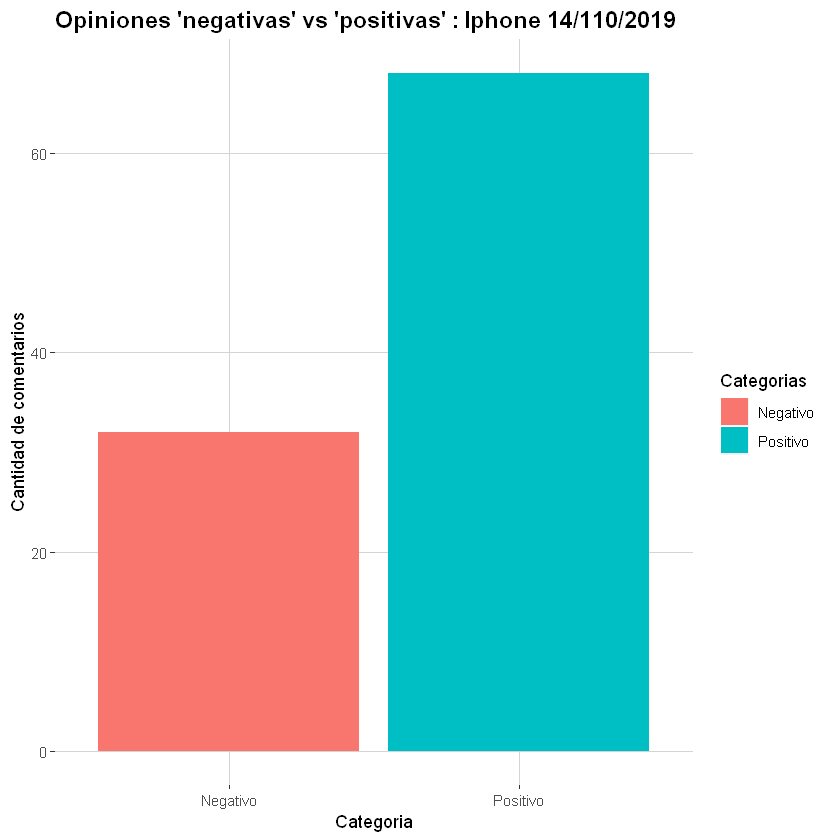

In [85]:
g <- ggplot(caso_iphone,aes(caso_iphone$puntaje,fill=caso_iphone$puntaje))+ geom_bar()
g + theme(panel.grid.major = element_line(colour = "gray83"), 
    plot.title = element_text(size = 14, face = "bold"), 
    panel.background = element_rect(fill = "gray100")) +
    labs(title = "Opiniones 'negativas' vs 'positivas' : Iphone 14/110/2019", 
    x = "Categoria", y = "Cantidad de comentarios", 
    fill = "Categorias")

# Conclusiones

Se habla en redes sociales positivamente más del iphone que opiniones negativa en el último año.